<a href="https://colab.research.google.com/github/LarsPLoge/Dat158-Oblig2/blob/main/Sopp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# To display plots directly in the notebook:
%matplotlib inline

In [91]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [92]:
pip install ucimlrepo

In [93]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (all columns in X are categorical based on the dataset description)
categorical_features = X.columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
# handle_unknown='ignore' will ignore categories not seen during training
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - though in this dataset, all are categorical
)

# Apply the ColumnTransformer to the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Original X_train shape:", X_train.shape)
print("Encoded X_train shape:", X_train_encoded.shape)

Original X_train shape: (6093, 22)
Encoded X_train shape: (6093, 117)


In [96]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=12)

# Train the model using the encoded training data
clf.fit(X_train_encoded, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=12)

In [97]:
y_pred = clf.predict(X_test_encoded)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(len(y_test))
print(1040+991)

Accuracy: 1.0
2031
2031


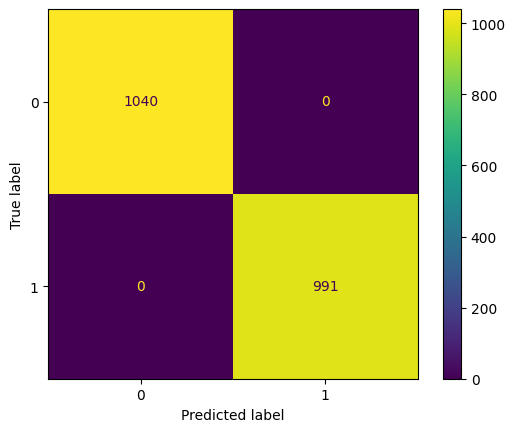

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()